# Lab 2: Exploratory Data Analysis (EDA)

This lab exercise demonstrates EDA of an example dataset with the Python modules `Pandas`, `Numpy`, `Matplotib` and `Seaborn`.

> *"At a high level, EDA is the practice of using visual and quantitative methods to understand and summarize a dataset without making any assumptions about its contents. It is a crucial step to take before diving into machine learning or statistical modeling because it provides the context needed to develop an appropriate model for the problem at hand and to correctly interpret its results."*
> <a href="https://www.svds.com/value-exploratory-data-analysis/">Chloe Mawer</a> 

## A. Importing Modules and Dataset

In [1]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

After importing the modules, the next step is to load the dataset into a Pandas dataframe.
Dataframe is the term used in Pandas for two-dimensional arrays.

In this tutorial, we use the example dataset loans_train.csv available as a CSV file.
The file loans_train.csv is expected to be in the same directory as this notebook.

In [32]:
df = pd.read_csv('./loans_train.csv')

# You can also open loans_train.csv with Excel and take a look at it.

## B. Quick Data Exploration

Once the dataset is loaded into a dataframe, we can have a look at the first and the last few data rows with the dataframe methods `head()` and `tail()`, respectively.

In [33]:
# Print first 5 rows of the dataframe
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
# Print last 5 rows of the dataframe
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


We can see that the dataset has 614 data rows, and both numerical and categorical atrributes. The data rows are typically called *observations* or *examples*, and the columns are also called *attributes* or *features*.

In [35]:
# Print statistical summary for all numerical attributes
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


There are a few inferences we can draw by looking at the output of `describe()`:

- `LoanAmount` has (614 – 592) 22 missing values.
- `Loan_Amount_Term` has (614 – 600) 14 missing values.
- `Credit_History` has (614 – 564) 50 missing values.

Note that `Credit_History` is rather a categorical attribute despite having numerical values. We can see that about 84% of the applicants have a credit history. How? `Credit_History` has value 1 for those who have a credit history, and 0 otherwise. The mean of `Credit_History` is 0.84, i.e. 84% of the applicants have a credit history.

Please note that we can also get an idea of a possible skew in the data by comparing the mean to the median. The median of each numerical attribute is the 50% figure.

For the categorical (non-numerical) attributes (e.g. `Property_Area`, `Gender`, `Education`, etc.), we can look at the count of each value/category (i.e. a frequency table) to understand how well each category is represented in the dataset.

`dfname['column_name']` is a basic indexing technique to acess a particular column of the dataframe.

For example, for attribute `Gender` the frequency table can be printed by the command:

In [36]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

We can see that the number of males in the dataset is more than three times larger than the number of females. We can also check the total count of values in column `Gender` with the command:

In [37]:
df['Gender'].count()

601

That is, there are 13 missing values in column `Gender`.

## C. Distribution Analysis for Numerical Atributes

Now that we are familiar with the basic dataset characteristics, let's look closer at the distribution of some numerical attributes. Let's take, for example, the numerical attributes `ApplicantIncome` and `LoanAmount`.

Text(0,0.5,'Number of Applicants')

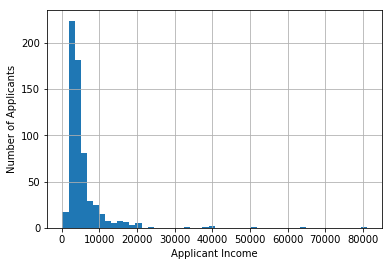

In [38]:
# Let's start by plotting a histogram of ApplicantIncome using the command:

df['ApplicantIncome'].hist(bins=50)
plt.xlabel('Applicant Income')
plt.ylabel('Number of Applicants')

In the histogram above, we observe that there are few extreme values of `ApplicantIncome`. The use of 50 bins allows to depict the distribution clearly.

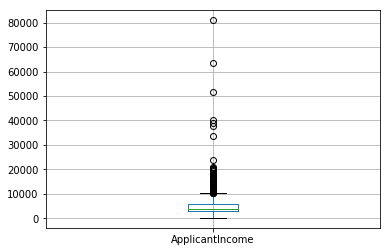

In [39]:
# Next, we look at boxplots to understand the distribution better.

df.boxplot(column='ApplicantIncome')

The boxplot above confirms the presence of a lot of outliers/extreme values. This may be attributed to the income disparity in the society. Part of this can be due to the fact that we are looking at people with different education levels. Let us segregate them by `Education`.

Text(0.5,0.98,'')

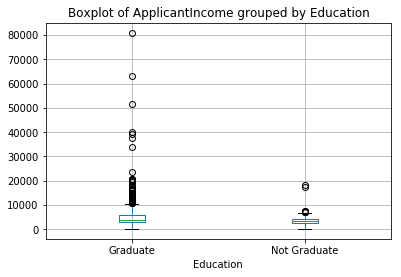

In [10]:
# Boxplots of ApplicantIncome, grouped by the categorical attribute Education
df.boxplot(column='ApplicantIncome', by='Education')
plt.title('Boxplot of ApplicantIncome grouped by Education')
plt.suptitle("") # get rid of the automatic 'Boxplot grouped by group_by_column_name' title

We can see that there is no substantial difference between the mean income of graduates and non-graduates. But there are a higher number of graduates with very high incomes.

In [1]:
# Next, we examine a histogram of the numerical attribute loanAmount

df['LoanAmount'].hist(bins=50)
plt.xlabel("Loan Amount")
plt.ylabel('Number of Applicants')

NameError: name 'df' is not defined

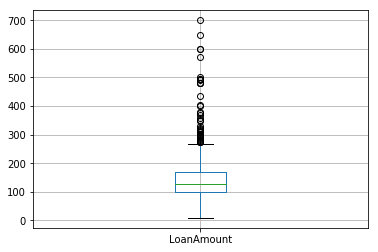

In [12]:
# Boxplot of LoanAmount
df.boxplot(column='LoanAmount')

Again, there are some extreme values. Clearly, both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing values as well as many extreme values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. We will take this up in the next lab exercise.

Finally, let's examine the relationship between `ApplicantIncome` and `LoanAmount` with a scatter plot.

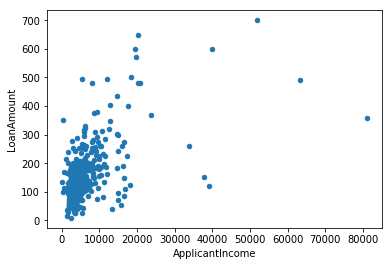

In [13]:
df.plot.scatter(x='ApplicantIncome', y='LoanAmount')

Based on this scatter plot we can say that LoanAmount probably tends to grow linearly as ApplicantIncome grows. We can see the trend clearer with `Seaborn's regplot`, which draws a line that best fits the relation between two numeric attributes.

> *"Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics."*https://seaborn.pydata.org/



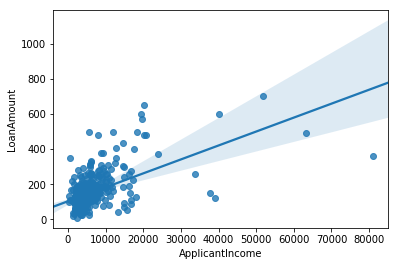

In [14]:
sns.regplot(x='ApplicantIncome', y='LoanAmount', data=df)

This regplot suggests that typically LoanAmount is 100 times lower than ApplicantIncome.

## D. Boxplots, Violinplots, Stripplots and Swarmplots

Next, we will use the `Seaborn` module to demonstrate a few variations or alternatives to boxplots.

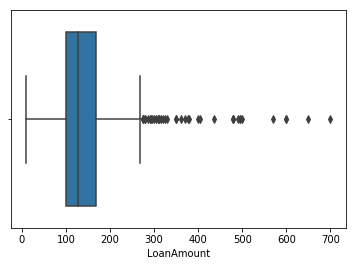

In [27]:
#First, let's draw a seaborn-style boxplot for LoanAmount

sns.boxplot(x=df['LoanAmount'])

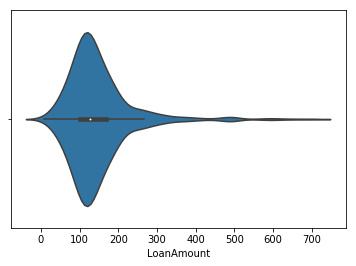

In [28]:
#Violinplot for LoanAmount

sns.violinplot(x=df['LoanAmount'])

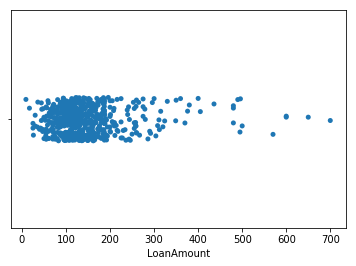

In [29]:
#Stripplot for LoanAmount

sns.stripplot(x=df['LoanAmount'], jitter=True)

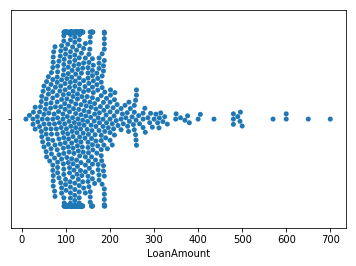

In [31]:
#Swarmplot for LoanAmount

sns.swarmplot(x=df['LoanAmount'])

Finally, let's redraw the boxplots of `ApplicantIncome`, grouped by the categorical attribute `Education`, as violinplots.

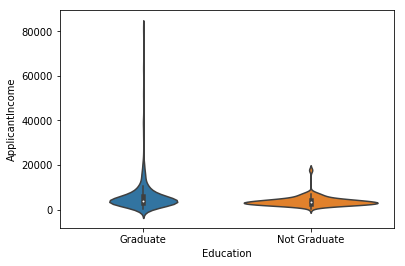

In [19]:
sns.violinplot(x='Education', y='ApplicantIncome', data=df)

You can see examples of the full potential of Seaborn's boxplots, violinplots, stripplots and swarmplots starting at https://seaborn.pydata.org/generated/seaborn.boxplot.html.

## E. Distribution Analysis for Categorical Attributes

As noted above `Credit_History` is rather a categorical attribute with two categories/values:
- 0 - the applicant has no credic history
- 1 - the applicant has a credit history

Let's look at the chances of getting a loan based on credit history. That is, let's examine the relation between atributes `Credit_History` and `Loan_Status`.

First, let's take a look at the frequency table for attribute `Credit_History`:

In [20]:
frequency_table = df['Credit_History'].value_counts(ascending=True)
print('Frequency Table for Credit History:') 
print(frequency_table)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64


Next, build an Excel-style pivot table for `Loan_Status` and `Credit_History` with the pivot_table method:

In [21]:
pivot_table = df.pivot_table(values='Loan_Status',
                       index=['Credit_History'],
                       aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean()) 

Here the values of `Loan_Status` are grouped by the index `Credit_History`, and the aggfunc is applied to each group. In the example above aggfunc is `mean()`, assuming the Y and N values in column `Loan_Status` are replaced by 1s and 0s, respectively.

In [22]:
# Print pivot table
print(pivot_table)

                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


The pivot table can be interprted as follows. The probability for getting a loan is 0.078652 (i.e. ~8%) for applicants with no credit history, and 0.795789 (i.e. ~80%) for applicants with a credit history.

Let's plot `Credit_History` and the probability of getting a loan based on `Credit_History`.

Text(0.5,1,'Applicants by Credit History')

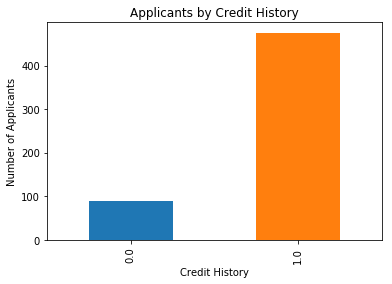

In [23]:
# Plot the frequency table for Credit_History
frequency_table.plot(kind='bar')
plt.xlabel('Credit History')
plt.ylabel('Number of Applicants')
plt.title('Applicants by Credit History')

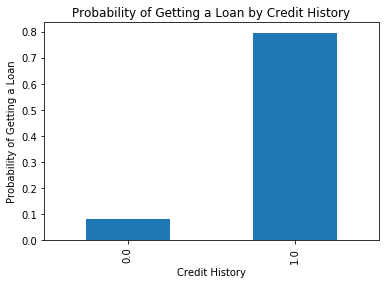

In [24]:
# Plot pivot table
pivot_table.plot(kind='bar')
plt.xlabel('Credit History')
plt.ylabel('Probability of Getting a Loan')
plt.title('Probability of Getting a Loan by Credit History')
plt.legend().set_visible(False) # we don't need the default legend

Alternately, the two plots above can be combined in a stacked chart by plotting the output of with Pandas' `crosstab()` function:

Text(0,0.5,'Number of Applicants')

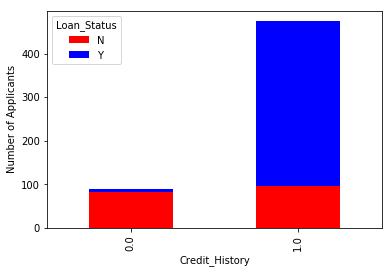

In [25]:
stacked_chart = pd.crosstab(df['Credit_History'], df['Loan_Status'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')

Furthermore, we can stackchart `Credit_History` and `Gender` against `Loan_Status`.

Text(0,0.5,'Number of Applicants')

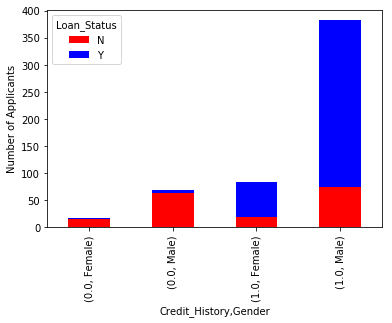

In [26]:
stacked_chart_gender = pd.crosstab([df['Credit_History'], df['Gender']], df['Loan_Status'])
stacked_chart_gender.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Applicants')